In [1]:
import pandas as pd
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image # For color and 8bit PNG files.
import numpy as np

imgPath = "/mnt/ml/NOAA/color"
irPath = "/mnt/ml/NOAA/thermal"
dataPath = "/mnt/ml/NOAA/arcticseals/data"

# Statistics

In [2]:
df = pd.read_csv("{}/training.csv".format(dataPath))
df

,hotspot_id,timestamp,filt_thermal16,filt_thermal8,filt_color,x_pos,y_pos,thumb_left,thumb_top,thumb_right,thumb_bottom,hotspot_type,species_id
0,16332.0,20160407234502.428GMT,CHESS_FL1_C_160407_234502.428_THERM-16BIT.PNG,CHESS_FL1_C_160407_234502.428_THERM-8-BIT.JPG,CHESS_FL1_C_160407_234502.428_COLOR-8-BIT.JPG,521,295,5125,1783,5637,2295,Anomaly,NaN
1,16331.0,20160407234502.428GMT,CHESS_FL1_C_160407_234502.428_THERM-16BIT.PNG,CHESS_FL1_C_160407_234502.428_THERM-8-BIT.JPG,CHESS_FL1_C_160407_234502.428_COLOR-8-BIT.JPG,521,295,5113,1777,5625,2289,Anomaly,NaN
2,16570.0,20160407235233.752GMT,CHESS_FL1_C_160407_235233.752_THERM-16BIT.PNG,CHESS_FL1_C_160407_235233.752_THERM-8-BIT.JPG,CHESS_FL1_C_160407_235233.752_COLOR-8-BIT.JPG,625,255,5864,2064,6376,2576,Anomaly,NaN
3,16569.0,20160407235233.752GMT,CHESS_FL1_C_160407_235233.752_THERM-16BIT.PNG,CHESS_FL1_C_160407_235233.752_THERM-8-BIT.JPG,CHESS_FL1_C_160407_235233.752_COLOR-8-BIT.JPG,298,164,2408,1183,2920,1695,Anomaly,NaN
4,16663.0,20160407235347.726GMT,CHESS_FL1_C_160407_235347.726_THERM-16BIT.PNG,CHESS_FL1_C_160407_235347.726_THERM-8-BIT.JPG,CHESS_FL1_C_160407_235347.726_COLOR-8-BIT.JPG,396,318,3604,2354,4116,2866,Anomaly,NaN
5,16662.0,20160407235347.726GMT,CHESS_FL1_C_160407_235347.726_THERM-16BIT.PNG,CHESS_FL1_C_160407_235347.726_THERM-8-BIT.JPG,CHESS_FL1_C_160407_235347.726_COLOR-8-BIT.JPG,361,275,3217,1897,3729,2409,Anomaly,NaN
6,16908.0,20160407235721.171GMT,CHESS_FL1_C_160407_235721.171_THERM-16BIT.PNG,CHESS_FL1_C_160407_235721.171_THERM-8-BIT.JPG,CHESS_FL1_C_160407_235721.171_COLOR-8-BIT.JPG,582,322,5514,2679,6026,3191,Anomaly,NaN
7,16977.0,20160407235833.627GMT,CHESS_FL1_C_160407_235833.627_THERM-16BIT.PNG,CHESS_FL1_C_160407_235833.627_THERM-8-BIT.JPG,CHESS_FL1_C_160407_235833.627_COLOR-8-BIT.JPG,371,295,3084,2404,3596,2916,Anomaly,NaN
8,16978.0,20160407235833.627GMT,CHESS_FL1_C_160407_235833.627_THERM-16BIT.PNG,CHESS_FL1_C_160407_235833.627_THERM-8-BIT.JPG,CHESS_FL1_C_160407_235833.627_COLOR-8-BIT.JPG,379,305,3196,2484,3708,2996,Anomaly,NaN
9,16988.0,20160407235851.225GMT,CHESS_FL1_C_160407_235851.225_THERM-16BIT.PNG,CHESS_FL1_C_160407_235851.225_THERM-8-BIT.JPG,CHESS_FL1_C_160407_235851.225_COLOR-8-BIT.JPG,349,460,3252,3144,3764,3656,Anomaly,NaN


In [3]:
df["width_color"] = df["thumb_right"] - df["thumb_left"]
df["height_color"] = df["thumb_bottom"] - df["thumb_top"]
df.describe(include="all")

,hotspot_id,timestamp,filt_thermal16,filt_thermal8,filt_color,x_pos,y_pos,thumb_left,thumb_top,thumb_right,thumb_bottom,hotspot_type,species_id,width_color,height_color
count,6624.000000,6624,6624,6624,6624,6624.00000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624,2974,6624.0,6624.0
unique,NaN,4800,4800,4800,4974,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN
top,NaN,20160530012152.491GMT,CHESS_FL8_C_160415_210756.388_THERM-16BIT.PNG,CHESS_FL27_P_160530_012152.491_THERM-8-BIT.JPG,CHESS_FL8_C_160415_210756.388_COLOR-8-BIT.JPG,NaN,NaN,NaN,NaN,NaN,NaN,Anomaly,Ringed Seal,NaN,NaN
freq,NaN,12,12,12,13,NaN,NaN,NaN,NaN,NaN,NaN,3650,2367,NaN,NaN
mean,113500.189041,NaN,NaN,NaN,NaN,313.85462,213.983394,2844.200785,1676.399004,3356.200785,2188.399004,NaN,NaN,512.0,512.0
std,65830.158286,NaN,NaN,NaN,NaN,175.93270,132.086363,1852.833367,1171.099106,1852.833367,1171.099106,NaN,NaN,0.0,0.0
min,6.000000,NaN,NaN,NaN,NaN,0.00000,0.000000,-619.000000,-734.000000,-107.000000,-222.000000,NaN,NaN,512.0,512.0
25%,80750.500000,NaN,NaN,NaN,NaN,165.00000,108.000000,1279.000000,690.750000,1791.000000,1202.750000,NaN,NaN,512.0,512.0
50%,89935.500000,NaN,NaN,NaN,NaN,307.00000,199.000000,2767.500000,1593.000000,3279.500000,2105.000000,NaN,NaN,512.0,512.0
75%,192128.000000,NaN,NaN,NaN,NaN,465.00000,314.000000,4403.000000,2570.500000,4915.000000,3082.500000,NaN,NaN,512.0,512.0


In [4]:
print(df.hotspot_type.unique())
print(df.species_id.unique())

['Anomaly' 'Animal']
[nan 'Bearded Seal' 'Ringed Seal' 'Polar Bear' 'UNK Seal']


# Loading data

### Color images

/mnt/ml/NOAA/color/CHESS_FL1_C_160407_234502.428_COLOR-8-BIT.JPG


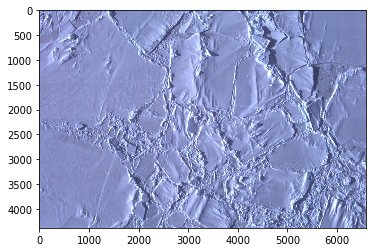

In [15]:
imageFile = "{}/{}".format(imgPath, df.iloc[0]["filt_color"])
print(imageFile)

image = Image.open(imageFile)
imshow(image)

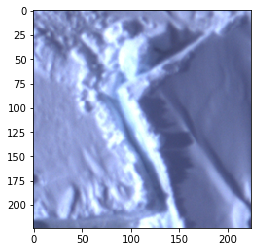

In [23]:
subimage = image.crop((df.iloc[0]["thumb_left"],df.iloc[0]["thumb_top"],df.iloc[0]["thumb_right"],df.iloc[0]["thumb_bottom"]))
size = 224, 224

subimage.thumbnail(size, Image.ANTIALIAS)

imshow(subimage)

### Infrared images

/mnt/ml/NOAA/thermal/CHESS_FL1_C_160407_234502.428_THERM-8-BIT.JPG


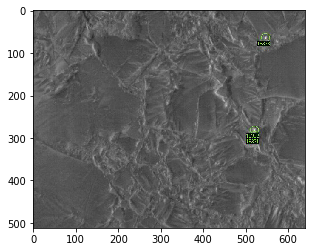

In [7]:
irFile8 = "{}/{}".format(irPath, df.iloc[0]["filt_thermal8"])
print(irFile8)

image = Image.open(irFile8)
imshow(image)

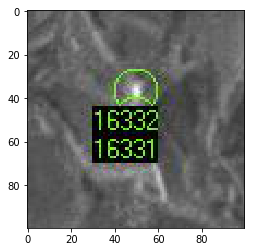

In [8]:
subimage = image.crop((df.iloc[0]["x_pos"]-50,df.iloc[0]["y_pos"]-50,df.iloc[0]["x_pos"]+50,df.iloc[0]["y_pos"]+50))
imshow(subimage)

/mnt/ml/NOAA/thermal/CHESS_FL1_C_160407_234502.428_THERM-16BIT.PNG
<class 'numpy.ndarray'>
[[51581 51501 51501 ... 51581 51601 51601]
 [51581 51581 51501 ... 51581 51581 51541]
 [51581 51541 51481 ... 51561 51521 51581]
 ...
 [51481 51421 51441 ... 51461 51501 51541]
 [51481 51441 51461 ... 51501 51521 51541]
 [51481 51481 51501 ... 51481 51461 51521]]


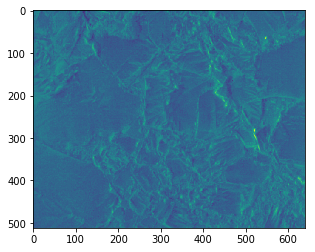

In [9]:
irFile16 = "{}/{}".format(irPath, df.iloc[0]["filt_thermal16"])

print(irFile16)

image = Image.open(irFile16)
npimage = np.array(image)

print(type(npimage))
print(npimage)

imshow(npimage)

# Image IO
#image = imageio.imread(irFile16)
#print(image.dtype)

#imshow(image, cmap='Greys_r')
#imshow(image)

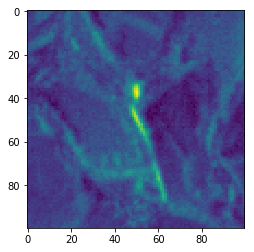

In [10]:
def numpy_crop(img, x1, y1, x2, y2):
    return img[y1:y2, x1:x2]

subimage = numpy_crop(npimage, df.iloc[0]["x_pos"]-50,df.iloc[0]["y_pos"]-50,df.iloc[0]["x_pos"]+50,df.iloc[0]["y_pos"]+50)
imshow(subimage)

In [25]:
import datetime
datetime.datetime.today().strftime('%Y-%m-%d')

'2018-07-24'